# Initial Data Load and Overview

## Imports

In [50]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from tqdm.notebook import tqdm
from Levenshtein import distance

## Data Load

In [51]:
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, '../data')

In [52]:
data = pd.read_excel(os.path.join(data_dir, 'external/antibody_info.xlsx'), header=1)
display(data)

,Antibody Name,Epitope Group,source,D614G,BA.1,BA.2,BA.2.75,BA.5,BQ.1.1,XBB,Heavy chain V gene,Heavy chain J gene,Light chain V gene,Light chain J gene,Heavy chain AA,Light chain AA
0,BD-196,C,WT convalescents,1.93,>10,>10,>10,>10,>10,>10,IGHV1-3,IGHJ6,IGKV2-58,IGKJ1,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,DVVMTQSPLSLPVTLGQPASISCRSSQSLVYSDGNTYLNWFQQRPG...
1,BD-218,A,WT convalescents,0.0104,0.00849,0.00937,0.0116,5.26,>10,>10,IGHV4-34,IGHJ1,IGKV3-11,IGKJ5,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSDYFWYWIRQPPGKGLE...,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...
2,BD-236,A,WT convalescents,0.0173,>10,>10,>10,>10,>10,>10,IGHV3-53,IGHJ6,IGKV1-9,IGKJ4,EVQLVESGGGLIQPGGSLRLSCAASGITVSSNYMSWVRQAPGKGLE...,IQLTQSPSSLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKLL...
3,BD-254,C,WT convalescents,0.25,>10,>10,>10,>10,>10,>10,IGHV3-23,IGHJ4,IGLV7-46,IGLJ2,EVQLLESGGGLVQPGGSLRLSCAASGFTLSSYAMSWVRQAPGRGLE...,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...
4,BD-255,B,WT convalescents,0.113,>10,>10,>10,>10,>10,>10,IGHV3-30,IGHJ6,IGKV3-15,IGKJ2,QVQLVESGGGVVQPGRSLRLSCVASGFTFSNYDMHWVRQAPGKGLE...,EIVMTQSPAILSVSPGERATLSCRASQSVTRNLAWYQQKPGQAPRL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,BD55-6726,E2.2,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-58,IGHJ2,IGKV3-24,IGKJ1,QMQLVQSGPEVKRPGTSVKVSCEASGFTFSSSAILWVRQPRGQRLE...,EIVLRQSPATVSLSPGERATLSCRASQSVHNYLAWFQQKPGQAPRL...
3047,BD55-6727,F2,SARS convalescents,0.293,4.37,>10,>10,>10,>10,>10,IGHV3-11,IGHJ1,IGKV1-39,IGKJ2,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMNWIRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQSISNYLNWYQQKPGKAPKL...
3048,BD55-6728,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV3-64,IGHJ2,IGKV1-39,IGKJ1,EVQLVESGGGLVQPGGSLRLSCAASGFTFSRFAMHWVRQAPGKGLE...,DIQMTQSPSSLSASLGDRVTITCRASQTISRYLNWYQQKPGKAPKV...
3049,BD55-6729,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-18,IGHJ6,IGLV3-25,IGLJ2,QVQLVQSGAEVKKPGTSMRVSCKASGYTFSTYGIIWVRQAPGQGLE...,SYELTQPPSVSVSPGQTARITCSGDAVATQFLYWYQQKSGQAPVMV...


## Countplots

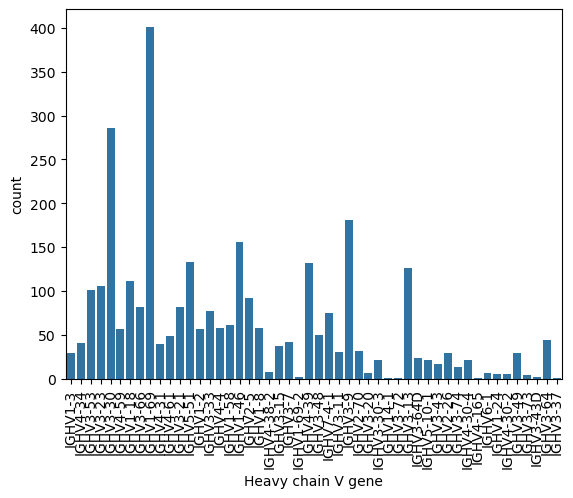

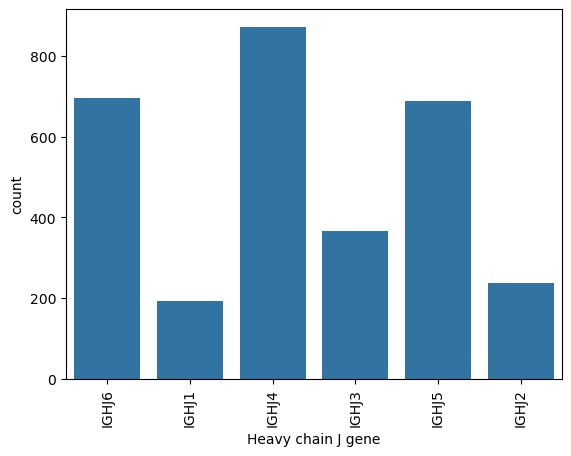

In [53]:
sns.countplot(data=data, x='Heavy chain V gene')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=data, x='Heavy chain J gene')
plt.xticks(rotation=90)
plt.show()

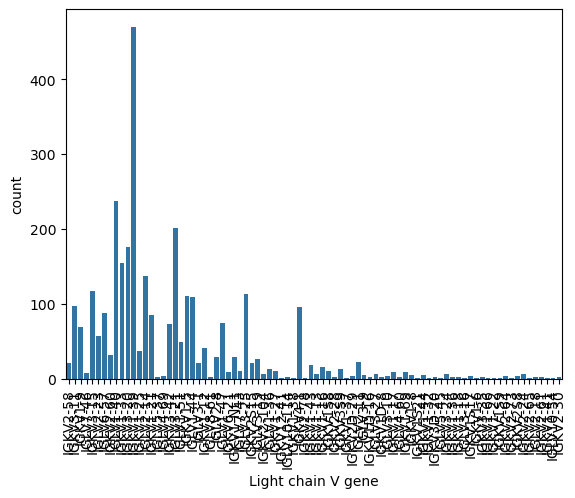

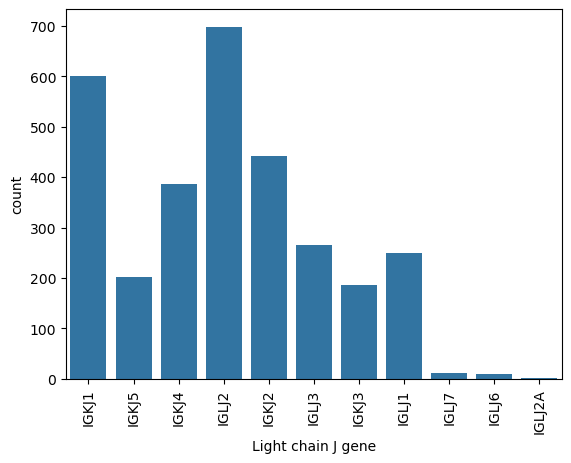

In [54]:
sns.countplot(data=data, x='Light chain V gene')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=data, x='Light chain J gene')
plt.xticks(rotation=90)
plt.show()

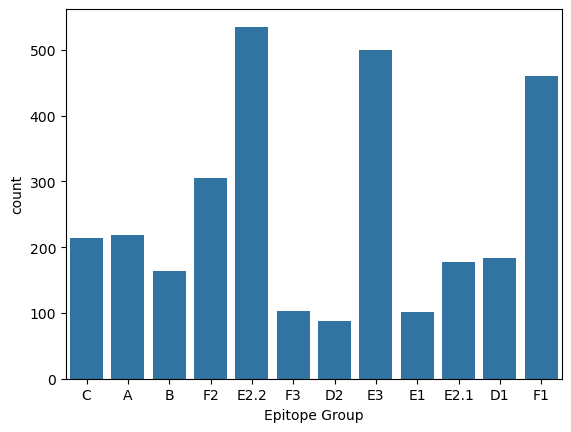

In [55]:
sns.countplot(data=data, x='Epitope Group')
plt.show()

In [56]:
data.drop_duplicates(subset=['Heavy chain AA', 'Light chain AA'])

,Antibody Name,Epitope Group,source,D614G,BA.1,BA.2,BA.2.75,BA.5,BQ.1.1,XBB,Heavy chain V gene,Heavy chain J gene,Light chain V gene,Light chain J gene,Heavy chain AA,Light chain AA
0,BD-196,C,WT convalescents,1.93,>10,>10,>10,>10,>10,>10,IGHV1-3,IGHJ6,IGKV2-58,IGKJ1,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,DVVMTQSPLSLPVTLGQPASISCRSSQSLVYSDGNTYLNWFQQRPG...
1,BD-218,A,WT convalescents,0.0104,0.00849,0.00937,0.0116,5.26,>10,>10,IGHV4-34,IGHJ1,IGKV3-11,IGKJ5,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSDYFWYWIRQPPGKGLE...,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...
2,BD-236,A,WT convalescents,0.0173,>10,>10,>10,>10,>10,>10,IGHV3-53,IGHJ6,IGKV1-9,IGKJ4,EVQLVESGGGLIQPGGSLRLSCAASGITVSSNYMSWVRQAPGKGLE...,IQLTQSPSSLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKLL...
3,BD-254,C,WT convalescents,0.25,>10,>10,>10,>10,>10,>10,IGHV3-23,IGHJ4,IGLV7-46,IGLJ2,EVQLLESGGGLVQPGGSLRLSCAASGFTLSSYAMSWVRQAPGRGLE...,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...
4,BD-255,B,WT convalescents,0.113,>10,>10,>10,>10,>10,>10,IGHV3-30,IGHJ6,IGKV3-15,IGKJ2,QVQLVESGGGVVQPGRSLRLSCVASGFTFSNYDMHWVRQAPGKGLE...,EIVMTQSPAILSVSPGERATLSCRASQSVTRNLAWYQQKPGQAPRL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,BD55-6726,E2.2,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-58,IGHJ2,IGKV3-24,IGKJ1,QMQLVQSGPEVKRPGTSVKVSCEASGFTFSSSAILWVRQPRGQRLE...,EIVLRQSPATVSLSPGERATLSCRASQSVHNYLAWFQQKPGQAPRL...
3047,BD55-6727,F2,SARS convalescents,0.293,4.37,>10,>10,>10,>10,>10,IGHV3-11,IGHJ1,IGKV1-39,IGKJ2,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMNWIRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQSISNYLNWYQQKPGKAPKL...
3048,BD55-6728,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV3-64,IGHJ2,IGKV1-39,IGKJ1,EVQLVESGGGLVQPGGSLRLSCAASGFTFSRFAMHWVRQAPGKGLE...,DIQMTQSPSSLSASLGDRVTITCRASQTISRYLNWYQQKPGKAPKV...
3049,BD55-6729,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-18,IGHJ6,IGLV3-25,IGLJ2,QVQLVQSGAEVKKPGTSMRVSCKASGYTFSTYGIIWVRQAPGQGLE...,SYELTQPPSVSVSPGQTARITCSGDAVATQFLYWYQQKSGQAPVMV...


In [57]:
data['Epitope Group'].unique()

array(['C', 'A', 'B', 'F2', 'E2.2', 'F3', 'D2', 'E3', 'E1', 'E2.1', 'D1',
       'F1'], dtype=object)

## Simple PCA

Blosum encode full sequences:

In [58]:
from Bio.Align import substitution_matrices
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the BLOSUM62 substitution matrix
matrix = substitution_matrices.load("BLOSUM62")


def blosum_encode(seq):
    """
    Encode a protein sequence using the BLOSUM62 substitution matrix.

    Parameters:
        seq (str): Protein sequence to encode.

    Returns:
        np.ndarray: A 1D array representing the encoded sequence.
    """
    encoding = []
    for pos, res in enumerate(list(seq)):
        # Find the index of the residue in the substitution matrix alphabet
        index = matrix.alphabet.index(res)
        # Get the substitution scores for the residue
        v = matrix[index, :]
        encoding.append(v)
    # Concatenate all residue encodings into a single array
    encoding = np.concatenate(encoding)
    return encoding


def blosum_encode_seqs(seq_list):
    """
    Encode a list of protein sequences using the BLOSUM62 substitution matrix.

    Sequences are padded with zeros to match the length of the longest sequence.

    Parameters:
        seq_list (list of str): List of protein sequences to encode.

    Returns:
        list of np.ndarray: Encoded and padded sequences as arrays.
    """
    seq_encodings = []
    # Determine the length of the longest sequence
    max_l = max([len(s) for s in seq_list])
    for seq in seq_list:
        # Calculate the padding length for the sequence
        pad_len = (max_l - len(seq)) * len(matrix.alphabet)
        # Encode the sequence and pad with zeros
        seq_enc = np.concatenate([blosum_encode(seq), np.zeros(pad_len)])
        seq_encodings.append(seq_enc)
    return seq_encodings


def plot_pca(seqs, labels, output_filename=None, **kwargs):
    """
    Perform PCA on BLOSUM-encoded protein sequences and plot the results.

    Parameters:
        seqs (list of str): List of protein sequences to encode and plot.
        labels (np.ndarray): Array of labels corresponding to the sequences.
        output_filename (str, optional): File name to save the plot. If None, the plot is displayed.
        **kwargs: Additional keyword arguments for matplotlib's scatter function.

    Returns:
        None
    """
    # Perform BLOSUM encoding on the sequences
    encodings = blosum_encode_seqs(seqs)
    # Perform PCA to reduce dimensions to 2
    pca = PCA(n_components=2)
    coords = pca.fit_transform(encodings)

    # Plot the PCA results, grouping points by their labels
    for label in np.unique(labels):
        idx = np.where(labels == label)
        plt.scatter(coords[idx, 0], coords[idx, 1], label=label, **kwargs)
    plt.legend()

    # Save or show the plot
    if not output_filename:
        plt.show()
    else:
        plt.savefig(output_filename)


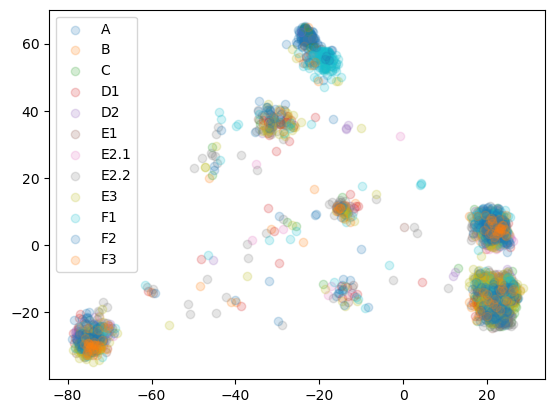

In [59]:
vh_seqs = data['Heavy chain AA'].values
labels = data['Epitope Group'].values

plot_pca(seqs=vh_seqs, labels=labels, alpha=0.2)

## Partition data into training and validation set

Use MMSEQS2


In [60]:
vh_seqs = data['Heavy chain AA'].values
vl_seqs = data['Light chain AA'].values

In [61]:
data

,Antibody Name,Epitope Group,source,D614G,BA.1,BA.2,BA.2.75,BA.5,BQ.1.1,XBB,Heavy chain V gene,Heavy chain J gene,Light chain V gene,Light chain J gene,Heavy chain AA,Light chain AA
0,BD-196,C,WT convalescents,1.93,>10,>10,>10,>10,>10,>10,IGHV1-3,IGHJ6,IGKV2-58,IGKJ1,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,DVVMTQSPLSLPVTLGQPASISCRSSQSLVYSDGNTYLNWFQQRPG...
1,BD-218,A,WT convalescents,0.0104,0.00849,0.00937,0.0116,5.26,>10,>10,IGHV4-34,IGHJ1,IGKV3-11,IGKJ5,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSDYFWYWIRQPPGKGLE...,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...
2,BD-236,A,WT convalescents,0.0173,>10,>10,>10,>10,>10,>10,IGHV3-53,IGHJ6,IGKV1-9,IGKJ4,EVQLVESGGGLIQPGGSLRLSCAASGITVSSNYMSWVRQAPGKGLE...,IQLTQSPSSLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKLL...
3,BD-254,C,WT convalescents,0.25,>10,>10,>10,>10,>10,>10,IGHV3-23,IGHJ4,IGLV7-46,IGLJ2,EVQLLESGGGLVQPGGSLRLSCAASGFTLSSYAMSWVRQAPGRGLE...,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...
4,BD-255,B,WT convalescents,0.113,>10,>10,>10,>10,>10,>10,IGHV3-30,IGHJ6,IGKV3-15,IGKJ2,QVQLVESGGGVVQPGRSLRLSCVASGFTFSNYDMHWVRQAPGKGLE...,EIVMTQSPAILSVSPGERATLSCRASQSVTRNLAWYQQKPGQAPRL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,BD55-6726,E2.2,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-58,IGHJ2,IGKV3-24,IGKJ1,QMQLVQSGPEVKRPGTSVKVSCEASGFTFSSSAILWVRQPRGQRLE...,EIVLRQSPATVSLSPGERATLSCRASQSVHNYLAWFQQKPGQAPRL...
3047,BD55-6727,F2,SARS convalescents,0.293,4.37,>10,>10,>10,>10,>10,IGHV3-11,IGHJ1,IGKV1-39,IGKJ2,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMNWIRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQSISNYLNWYQQKPGKAPKL...
3048,BD55-6728,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV3-64,IGHJ2,IGKV1-39,IGKJ1,EVQLVESGGGLVQPGGSLRLSCAASGFTFSRFAMHWVRQAPGKGLE...,DIQMTQSPSSLSASLGDRVTITCRASQTISRYLNWYQQKPGKAPKV...
3049,BD55-6729,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-18,IGHJ6,IGLV3-25,IGLJ2,QVQLVQSGAEVKKPGTSMRVSCKASGYTFSTYGIIWVRQAPGQGLE...,SYELTQPPSVSVSPGQTARITCSGDAVATQFLYWYQQKSGQAPVMV...


In [62]:
with open(os.path.join(data_dir, 'raw', 'heavy_chain.fasta'), 'w') as f:
    for index, row in data.iterrows():
        f.write(f'>{row['Antibody  Name']}\n{row['Heavy chain AA']}\n')

In [63]:
with open(os.path.join(data_dir, 'raw', 'light_chain.fasta'), 'w') as f:
    for index, row in data.iterrows():
        f.write(f'>{row['Antibody  Name']}\n{row['Light chain AA']}\n')

Use MMSeqs2 to cluster sequences based on sequence identity:

<code>
mmseqs easy-cluster data/raw/heavy_chain.fasta data/interim/heavy_chain_clus90 tmp --min-seq-id 0.9 -c 0 --cov-mode 0

mmseqs easy-cluster data/raw/light_chain.fasta data/interim/light_chain_clus90 tmp --min-seq-id 0.9 -c 0 --cov-mode 0
</code>

Would use subprocess to run from notebook (see below) but will not work properly...

In [64]:
# import subprocess
# cmd = ['mmseqs', 
#        'easy-cluster', 
#        os.path.join(data_dir, 'raw', 'heavy_chain.fasta'), 
#        os.path.join(data_dir, 'interrim', 'heavy_chain_clust_90'), 
#        'tmp', 
#        '--perc-ident', '0.9',
#        '-c', '0']
# subprocess.run(cmd, shell=True, check=True)

In [65]:
clus_vh = pd.read_table(os.path.join(data_dir, 'interim', 'heavy_chain_clus90_cluster.tsv'), header=None)
clus_map = {name: i for i, name in enumerate(clus_vh[0].unique())}
clus_name_map = {seq_name: clus_map[clus_name] for clus_name, seq_name in clus_vh.values}
print('Number of clusters:', len(clus_map))
data['clus_vh'] = data['Antibody  Name'].map(clus_name_map)

Number of clusters: 2572


In [66]:
clus_vl = pd.read_table(os.path.join(data_dir, 'interim', 'light_chain_clus90_cluster.tsv'), header=None)
clus_map = {name: i for i, name in enumerate(clus_vl[0].unique())}
clus_list = [clus_map[name] for name in clus_vl[0]]
clus_name_map = {seq_name: clus_map[clus_name] for clus_name, seq_name in clus_vl.values}
print('Number of clusters:', len(clus_map))
data['clus_vl'] = data['Antibody  Name'].map(clus_name_map)

Number of clusters: 916


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
import networkx as nx
import pandas as pd


def initialize_graph(data):
    """
    Initialize a graph where nodes represent rows in the dataset, and group information
    is stored in dictionaries for clustering based on VH and VL cluster IDs.

    Parameters:
        data (pd.DataFrame): Input data with 'clus_vh' and 'clus_vl' columns for clustering.

    Returns:
        tuple: A NetworkX graph, a dictionary mapping VH clusters to node indices, and
               a dictionary mapping VL clusters to node indices.
    """
    G = nx.Graph()  # Create an undirected graph
    cluster_dict_vh = dict()
    cluster_dict_vl = dict()

    # Add nodes and populate cluster dictionaries
    for idx, row in data.iterrows():
        G.add_node(idx)  # Add a node for each row
        cluster_dict_vh.setdefault(row['clus_vh'], []).append(idx)
        cluster_dict_vl.setdefault(row['clus_vl'], []).append(idx)

    return G, cluster_dict_vh, cluster_dict_vl


def add_edges(G, cluster_dict):
    """
    Add edges to the graph between nodes that share the same cluster.

    Parameters:
        G (nx.Graph): A NetworkX graph to which edges will be added.
        cluster_dict (dict): A dictionary mapping cluster IDs to lists of node indices.

    Returns:
        nx.Graph: The updated graph with edges added.
    """
    for clus, idxs in cluster_dict.items():
        # Connect all nodes within the same cluster
        for i in range(len(idxs) - 1):
            for j in range(i + 1, len(idxs)):
                name1 = idxs[i]
                name2 = idxs[j]
                G.add_edge(name1, name2)

    return G


def create_dataset_map(train_components, test_components):
    """
    Create a mapping of node indices to dataset labels (train or eval).

    Parameters:
        train_components (list of sets): List of connected components for the training dataset.
        test_components (list of sets): List of connected components for the evaluation dataset.

    Returns:
        dict: A mapping of node indices to dataset labels ('train' or 'eval').
    """
    dataset_map = dict()
    for components, label in zip([train_components, test_components], ['train', 'eval']):
        for component in components:
            for idx in component:
                dataset_map[idx] = label
    return dataset_map


def partition_data(data, **kwargs):
    """
    Partition the dataset into training and evaluation subsets while ensuring
    that connected components remain within the same subset.

    Parameters:
        data (pd.DataFrame): Input data with clustering information ('clus_vh', 'clus_vl').
        **kwargs: Additional arguments for GroupShuffleSplit, such as test_size and random_state.

    Returns:
        tuple: Two pandas DataFrames, one for training data and one for test data.
    """
    # Initialize the graph and cluster dictionaries
    G, cluster_dict_vh, cluster_dict_vl = initialize_graph(data)

    # Add edges to the graph based on VH and VL clustering
    G = add_edges(G, cluster_dict_vh)
    G = add_edges(G, cluster_dict_vl)

    # Identify connected components in the graph
    connected_components = list(nx.connected_components(G))

    # Map each sequence ID to its connected component ID
    connect_map = {seq_id: clus_no for clus_no, clus in enumerate(connected_components) for seq_id in clus}
    data['connected'] = data.index.map(connect_map)

    # Split the data into train and test sets using GroupShuffleSplit
    splitter = GroupShuffleSplit(**kwargs)
    split = splitter.split(data, groups=data['connected'])
    train_inds, test_inds = next(split)
    train_data = data.iloc[train_inds]
    test_data = data.iloc[test_inds]

    return train_data, test_data


In [68]:
train_data, test_data = partition_data(data, test_size=0.6, n_splits=2, random_state=7)
print(len(train_data))
print(len(test_data))
print(len(train_data) / len(data))
print(len(test_data) / len(data))

2231
820
0.7312356604392003
0.26876433956079976


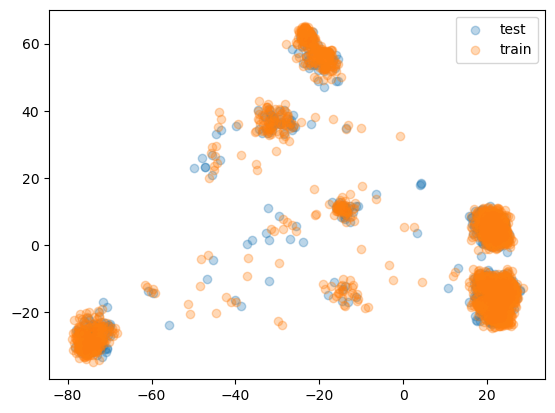

In [69]:
seqs = np.concatenate([train_data['Heavy chain AA'].values, test_data['Heavy chain AA'].values])
labels = np.concatenate([np.repeat('train', len(train_data)), np.repeat('test', len(test_data))])
plot_pca(seqs, labels, alpha=0.3)

In [70]:
dist_mat = np.zeros((len(train_data), len(train_data)))
for i in tqdm(range(len(train_data)-1)):
    seq1 = train_data.iloc[i]['Heavy chain AA']
    for j in range(i+1, len(train_data)):
        seq2 = train_data.iloc[j]['Heavy chain AA']
        dist = distance(seq1, seq2)
        dist_mat[i, j] = dist

  0%|          | 0/2230 [00:00<?, ?it/s]

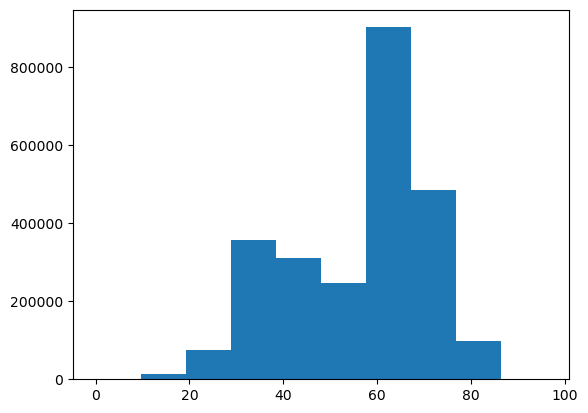

0.0


In [71]:
plt.hist(dist_mat[np.triu_indices(dist_mat.shape[0], k=1)])
plt.show()
print(min(dist_mat[np.triu_indices(dist_mat.shape[0], k=1)]))

In [72]:
dist_mat_flat = []
for i in tqdm(range(len(train_data)-1)):
    seq1 = train_data.iloc[i]['Heavy chain AA']
    for j in range(len(test_data)):
        seq2 = test_data.iloc[j]['Heavy chain AA']
        dist = distance(seq1, seq2)
        dist_mat_flat.append(dist)

  0%|          | 0/2230 [00:00<?, ?it/s]

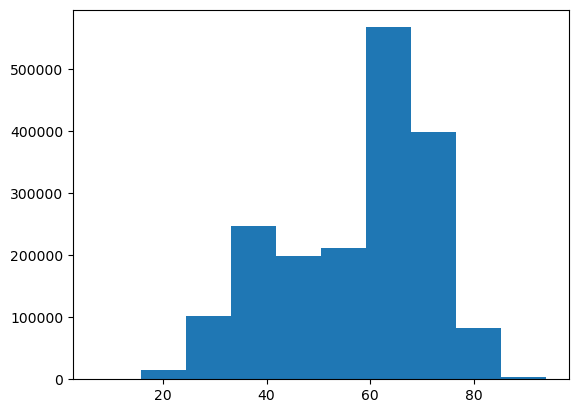

7


In [73]:
plt.hist(dist_mat_flat)
plt.show()
print(min(dist_mat_flat))

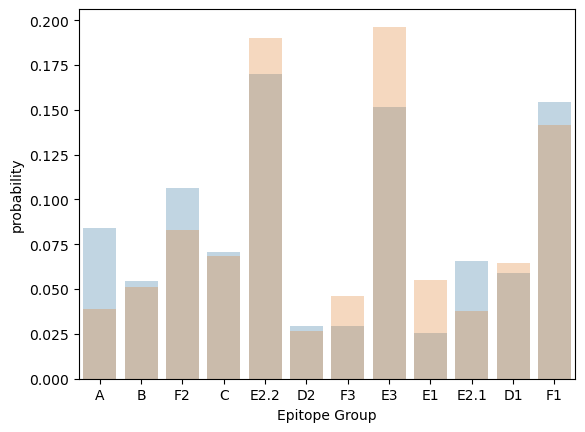

In [74]:
sns.countplot(data=train_data, x='Epitope Group', alpha=0.3, stat='probability')
sns.countplot(data=test_data, x='Epitope Group', alpha=0.3, stat='probability')
plt.show()

In [75]:
data.loc[train_data.index, 'partition'] = 'Train'
data.loc[test_data.index, 'partition'] =  'Validation'

Add test set

In [77]:
test_idx = np.concatenate([np.random.choice(data[data['partition'] == 'Train'].index, 150),
                           np.random.choice(data[data['partition'] == 'Validation'].index, 150)])

data.loc[test_idx, 'partition'] = 'Test'

In [82]:
data['partition'].value_counts() / len(data)

partition
Train         0.685021
Validation    0.223533
Test          0.091445
Name: count, dtype: float64

In [83]:
data.to_csv('../data/raw/dataset_w_partition.csv')

# Full CoVAbDab

In [2]:
import pandas as pd

In [11]:
covabdab = pd.read_csv('../data/external/covabdab_search_results.csv', index_col=0)

In [8]:
abcov = []
for i in range(4):
    abcov.append(pd.read_csv(f'../data/external/abcov_antibodies_pageno{i+1}.csv', index_col=1))
abcov = pd.concat(abcov)
    

In [12]:
abcov

,Entry,Type,IC50,EC50,Binding Affinity (KD),Neutralizes,Viral protein:epitope,PMID,Year,Structures,Mutational profile
Antibody name,,,,,,,,,,,
B38,ABSe0001,Ab,177 ng/ml,,70.1,SARS-CoV-2,S: RBD,32404477 (),2020.0,7BZ5,IF0012
H4,ABSe0002,Ab,896 ng/ml,,4.48,SARS-CoV-2,S: RBD,32404477 (),2020.0,NaN,NaN
CA1,ABSe0003,Ab,380 ng/ml,,4.68,SARS-CoV-2,S: RBD,32454512 (),2020.0,NaN,NaN
CB6,ABSe0004,Ab,36 ng/ml,,2.49,SARS-CoV-2,S: RBD,32454512 (),2020.0,7C01,IF0013
P2B-2F6,ABSe0005,Ab,50 ng/ml,,5.14,SARS-CoV-2,S: RBD,32454513 (),2020.0,7BWJ,IF0010
...,...,...,...,...,...,...,...,...,...,...,...
ADI-55688,ABSe1954,Ab,1500 ng/ml,,NaN,SHC014,S: RBD,33495307 (),2021.0,NaN,NaN
ADG-2,ABSe1955,Ab,8 ng/ml,,0.39,SARS-CoV,S: RBD,33495307 (),2021.0,NaN,NaN
ADG-2,ABSe1956,Ab,6 ng/ml,,0.42,WIV1,S: RBD,33495307 (),2021.0,NaN,NaN


In [17]:
affinity_data = abcov.dropna(subset='Binding Affinity (KD)').index.drop_duplicates()
abcov.loc[affinity_data]

,Entry,Type,IC50,EC50,Binding Affinity (KD),Neutralizes,Viral protein:epitope,PMID,Year,Structures,Mutational profile
Antibody name,,,,,,,,,,,
B38,ABSe0001,Ab,177 ng/ml,,70.1,SARS-CoV-2,S: RBD,32404477 (),2020.0,7BZ5,IF0012
H4,ABSe0002,Ab,896 ng/ml,,4.48,SARS-CoV-2,S: RBD,32404477 (),2020.0,NaN,NaN
CA1,ABSe0003,Ab,380 ng/ml,,4.68,SARS-CoV-2,S: RBD,32454512 (),2020.0,NaN,NaN
CB6,ABSe0004,Ab,36 ng/ml,,2.49,SARS-CoV-2,S: RBD,32454512 (),2020.0,7C01,IF0013
P2B-2F6,ABSe0005,Ab,50 ng/ml,,5.14,SARS-CoV-2,S: RBD,32454513 (),2020.0,7BWJ,IF0010
...,...,...,...,...,...,...,...,...,...,...,...
2000000,ABSe1914,Ab,,,60.3,MERS-CoV,S: RBD,26391698 (),2015.0,NaN,NaN
4C2,ABSe1915,Ab,,,162,MERS-CoV,S: RBD,26391698 (),2015.0,5DO2,IF0037
MERS-4V2,ABSe1938,Ab,,,0.342,MERS-CoV,S: RBD,29996104 (),2018.0,5YY5,NaN


In [ ]:
for index, row in abcov.loc[affinity_data].iterrows():
    

In [14]:
covabdab.loc['ADG-2']

Ab or Nb                                                                               Ab
Binds to                                SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...
Doesn't Bind to                                                                       NaN
Neutralising Vs                         SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...
Not Neutralising Vs                     RaTG13;SARS-CoV2_Omicron-BA2.38;MERS-CoV;SARS-...
Protein + Epitope                                                                  S; RBD
Origin                                                          Engineered from ADI-55688
VHorVHH                                 EVQLVESGGGLVKPGGSLRLSCAASGFTFSSYYMNWVRQAPGKGLE...
VL                                      QSVLTQPPSVSGAPGQRITISCTGSSSNIGAGYDVHWYQQLPGTAP...
Heavy V Gene                                                             IGHV3-21 (Human)
Heavy J Gene                                                                IGHJ4 (Human)
Light V Ge